## Week 2
- try different text parameters, min_df
- test logistic regression parameters (penalty, C)
- try different count vectorizors, TF-IDF, ngrams
- multi class classification

In [8]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
GoEmo_df = pd.read_csv('GoEmotions_cleaned_ekman.csv')
GoEmo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56873 entries, 0 to 56872
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              56873 non-null  object
 1   text            56873 non-null  object
 2   subreddit       56873 non-null  object
 3   admiration      56873 non-null  int64 
 4   amusement       56873 non-null  int64 
 5   anger           56873 non-null  int64 
 6   annoyance       56873 non-null  int64 
 7   approval        56873 non-null  int64 
 8   caring          56873 non-null  int64 
 9   confusion       56873 non-null  int64 
 10  curiosity       56873 non-null  int64 
 11  desire          56873 non-null  int64 
 12  disappointment  56873 non-null  int64 
 13  disapproval     56873 non-null  int64 
 14  disgust         56873 non-null  int64 
 15  embarrassment   56873 non-null  int64 
 16  excitement      56873 non-null  int64 
 17  fear            56873 non-null  int64 
 18  gratit

In [15]:
positive_subset.head(10)

,text,positive
0,Fast as [NAME] will carry me. Seriously uptown...,1
1,You blew it. They played you like a fiddle.,0
2,TL;DR No more Superbowls for [NAME]. Get ready...,0
3,So much time saved. Not.,0
4,Emotes have a ridiculous amount of effort put ...,0
5,Just life.. I feel like i'm just a parasite th...,0
6,Thanks for the advice man ! Have a great New Y...,1
7,*they were not* 😂 perfect. I’m sure they were ...,1
8,Glad to hear it. You deserve your best life wi...,1
9,To be fair you haev to have a very high iq to ...,0


In [10]:
# get just the postive columns along with text
positive_subset = GoEmo_df.iloc[:, [1, 31]].copy()

# store simplified data in X and y
X = positive_subset['text']
y = positive_subset['positive']

In [11]:
# splitting our data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

# 1. Instantiate
bagofwords = CountVectorizer(stop_words="english", min_df = 20)
# 2. Fit
bagofwords.fit(X_train)

# 3. Transform
X_train_transformed = bagofwords.transform(X_train)
X_test_transformed = bagofwords.transform(X_test) 
X_train_transformed

<42654x1889 sparse matrix of type '<class 'numpy.int64'>'
	with 173762 stored elements in Compressed Sparse Row format>

In [36]:
from sklearn.linear_model import LogisticRegression

# Fitting a model
logreg = LogisticRegression()
logreg.fit(X_train_transformed, y_train)

# Training and test score
print(f"Train score: {logreg.score(X_train_transformed, y_train)}")
print(f"Test score: {logreg.score(X_test_transformed, y_test)}")

Train score: 0.8402494490551883
Test score: 0.8294535480694845


c:\Users\trann\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:

min_ = range(1,101)

train_score = []
test_score = []

for i in min_:
# 1. Instantiate
    bagofwords = CountVectorizer(stop_words="english", min_df = i)
# 2. Fit
    bagofwords.fit(X_train)

# 3. Transform
    X_train_transformed = bagofwords.transform(X_train)
    X_test_transformed = bagofwords.transform(X_test) 

    logreg = LogisticRegression()
    logreg.fit(X_train_transformed, y_train)
    
    train_score.append(logreg.score(X_train_transformed, y_train))
    test_score.append(logreg.score(X_test_transformed, y_test))



c:\Users\trann\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\trann\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

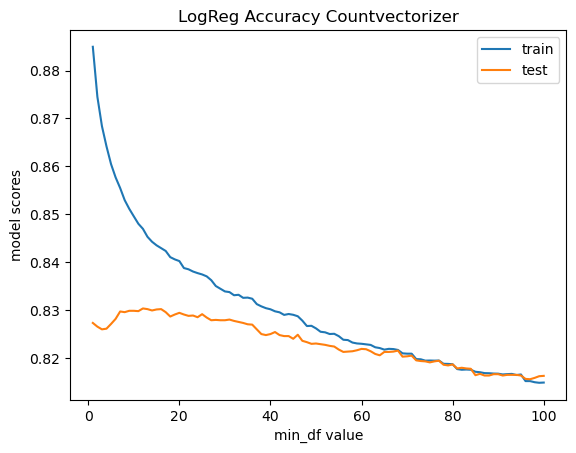

In [34]:
plt.figure()
plt.plot(min_, train_score, label = 'train')
plt.plot(min_, test_score, label = 'test')
plt.xlabel('min_df value')
plt.ylabel('model scores')
plt.legend()
plt.title('LogReg Accuracy Countvectorizer')
plt.show()

With min_df = 5, the test score is the same as the baseline model (82.7%)
- train score decreased from 88.5% to 86%
- lets check different values of C

In [37]:
# test different values of C
c_test = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

train_score = []
test_score = []


for i in c_test:
    logreg = LogisticRegression(C = i)
    logreg.fit(X_train_transformed, y_train)
    train_score.append(logreg.score(X_train_transformed, y_train))
    test_score.append(logreg.score(X_test_transformed, y_test))

c:\Users\trann\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\trann\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [8]:
test_score

[0.6373865954005205,
 0.6660102679513327,
 0.7842323651452282,
 0.8243899008369083,
 0.8271327097545538,
 0.8096209297418947,
 0.8034320275687461]

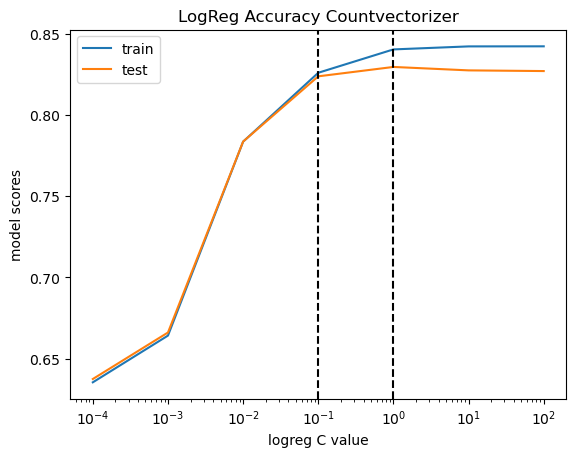

In [38]:
plt.figure()
plt.plot(c_test, train_score, label = 'train')
plt.plot(c_test, test_score, label = 'test')
plt.xscale("log")
plt.xlabel('logreg C value')
plt.ylabel('model scores')
plt.axvline(0.1, linestyle = '--', c = 'black')
plt.axvline(1, linestyle = '--', c = 'black')
plt.legend()
plt.title('LogReg Accuracy Countvectorizer')
plt.show()

C values of 0.1 and 1 have the best scores for test data
- c value at greater than 0.1 is approaching overfit
- test scores go down at c values greater than 0.1 aswell

# TF-IDF Vectorization

In [39]:
## TF-IDF vectorization

from sklearn.feature_extraction.text import TfidfVectorizer

# using our custom tokenizer in TfidfVectorizer
tfidf = TfidfVectorizer(stop_words="english", min_df = 20)
tfidf.fit(X_train)

X_train_transformed = tfidf.transform(X_train)
X_test_transformed = tfidf.transform(X_test)

X_train_transformed.shape

(42654, 1889)

In [40]:
# Fitting a model
logreg = LogisticRegression()
logreg.fit(X_train_transformed, y_train)

# Training and test score
print(f"Train score: {logreg.score(X_train_transformed, y_train)}")
print(f"Test score: {logreg.score(X_test_transformed, y_test)}")

Train score: 0.8356074459605195
Test score: 0.8278359940924116


c:\Users\trann\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


c:\Users\trann\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


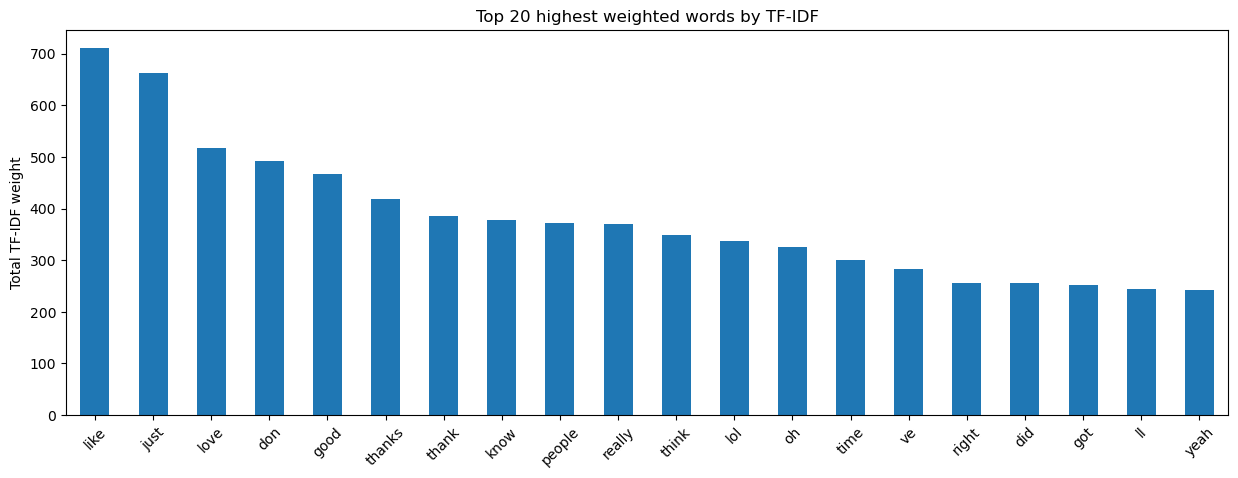

In [12]:
word_counts = pd.DataFrame(
    {"counts": X_train_transformed.toarray().sum(axis=0)},
    index=tfidf.get_feature_names()
).sort_values("counts", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 highest weighted words by TF-IDF")
plt.ylabel("Total TF-IDF weight")
plt.xticks(rotation=45)
plt.show()

In [13]:
# test different values of C
c_test = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

train_score = []
test_score = []


for i in c_test:
    logreg = LogisticRegression(C = i)
    logreg.fit(X_train_transformed, y_train)
    train_score.append(logreg.score(X_train_transformed, y_train))
    test_score.append(logreg.score(X_test_transformed, y_test))

c:\Users\trann\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\trann\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [14]:
test_score

[0.6373865954005205,
 0.6373865954005205,
 0.6830297489274914,
 0.7969618116604543,
 0.8265700822842675,
 0.8159504887826148,
 0.7883114143048034]

In [15]:
train_score

[0.6353448680076897,
 0.6353448680076897,
 0.6785530079242275,
 0.796595864397243,
 0.8532376799362311,
 0.9185773901627046,
 0.9360669573779716]

train = 85.3% accuracy at c=1 <br>
test = 82.6% accuracy at c=1


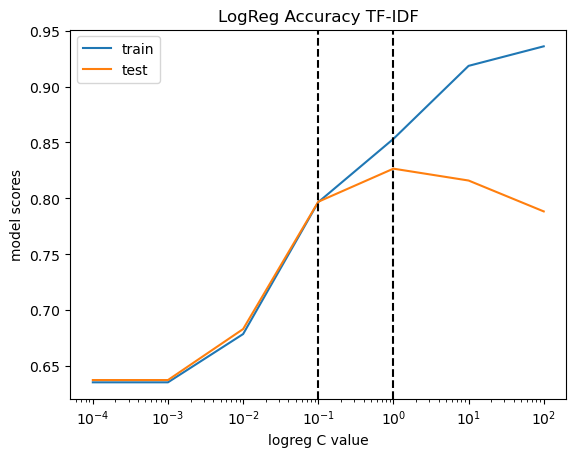

In [16]:
plt.figure()
plt.plot(c_test, train_score, label = 'train')
plt.plot(c_test, test_score, label = 'test')
plt.xscale("log")
plt.xlabel('logreg C value')
plt.ylabel('model scores')
plt.axvline(0.1, linestyle = '--', c = 'black')
plt.axvline(1, linestyle = '--', c = 'black')
plt.legend()
plt.title('LogReg Accuracy TF-IDF')
plt.show()

# N-grams

In [17]:
bagofwords = CountVectorizer(min_df=5,
                             ngram_range=(1, 3))
bagofwords.fit(X_train)

X_train_transformed = bagofwords.transform(X_train)
X_test_transformed = bagofwords.transform(X_test)

X_train_transformed.shape

(42654, 23113)

In [18]:
words = bagofwords.get_feature_names()
word_counts = X_train_transformed.toarray().sum(axis=0)
count_df = pd.DataFrame({'token': words, 'counts': word_counts})
count_df.head()

c:\Users\trann\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,token,counts
0,00,16
1,000,38
2,10,213
3,10 10,15
4,10 hours,5


In [19]:
#filter for bigrams

count_df[count_df['token'].str.split(' ').apply(len) == 2].sort_values('counts', ascending=False).head(20)

,token,counts
8465,in the,1377
22797,you re,1205
19066,this is,1170
12950,of the,1131
19493,to be,942
17189,thank you,885
5865,for the,824
9472,it was,680
13249,on the,670
8230,if you,636


In [20]:
# Fitting a model
logreg = LogisticRegression()
logreg.fit(X_train_transformed, y_train)

# Training and test score
print(f"Train score: {logreg.score(X_train_transformed, y_train)}")
print(f"Test score: {logreg.score(X_test_transformed, y_test)}")

Train score: 0.9300182866788578
Test score: 0.8279766509599831


c:\Users\trann\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


- test was slightly higher than base model 82.79% from 82.73%

c:\Users\trann\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\trann\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

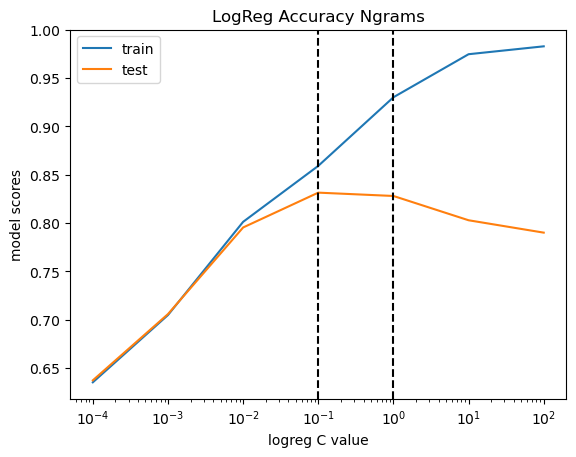

In [21]:
# test different values of C
c_test = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

train_score = []
test_score = []


for i in c_test:
    logreg = LogisticRegression(C = i)
    logreg.fit(X_train_transformed, y_train)
    train_score.append(logreg.score(X_train_transformed, y_train))
    test_score.append(logreg.score(X_test_transformed, y_test))

plt.figure()
plt.plot(c_test, train_score, label = 'train')
plt.plot(c_test, test_score, label = 'test')
plt.xscale("log")
plt.xlabel('logreg C value')
plt.ylabel('model scores')
plt.axvline(0.1, linestyle = '--', c = 'black')
plt.axvline(1, linestyle = '--', c = 'black')
plt.legend()
plt.title('LogReg Accuracy Ngrams')
plt.show()

In [22]:
test_score

[0.6373865954005205,
 0.7058864899078697,
 0.7954145861171672,
 0.8314227442154863,
 0.8279766509599831,
 0.8028694000984599,
 0.7900696251494479]

# Multi class classifications
- positive/negative/neutral/ambiguous

In [41]:
sentiment_dummies = pd.DataFrame(GoEmo_df[['positive', 'neutral', 'negative', 'ambiguous']])

In [42]:
sentiment_dummies['Sentiment'] = sentiment_dummies.cumsum(axis=1).ne(1).sum(axis=1)

In [43]:
sentiment_dummies

,positive,neutral,negative,ambiguous,Sentiment
0,1,0,0,0,0
1,0,1,0,0,1
2,0,0,1,0,2
3,0,0,0,1,3
4,0,1,0,0,1
...,...,...,...,...,...
56868,0,0,0,1,3
56869,0,0,1,0,2
56870,0,1,0,0,1
56871,1,0,0,0,0


In [44]:
simple_data = pd.concat([GoEmo_df['text'], sentiment_dummies['Sentiment']], axis = 1).copy

In [45]:
text_df = GoEmo_df['text']
senti_df = sentiment_dummies['Sentiment']
simple_data = pd.concat([text_df, senti_df], axis = 1)

In [ ]:
# save for future use/ modeling
simple_data.to_csv('GoEmotions_Sentiment_simple.csv', index = False)

In [46]:
# store simplified data in X and y
X = simple_data['text']
y = simple_data['Sentiment']

In [47]:
# splitting our data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [48]:
from sklearn.feature_extraction.text import CountVectorizer

# 1. Instantiate
bagofwords = CountVectorizer(stop_words="english",
                             min_df= 20)
# 2. Fit
bagofwords.fit(X_train)

# 3. Transform
X_train_transformed = bagofwords.transform(X_train)
X_test_transformed = bagofwords.transform(X_test) 
X_train_transformed

<42654x1889 sparse matrix of type '<class 'numpy.int64'>'
	with 173762 stored elements in Compressed Sparse Row format>

In [49]:
from sklearn.linear_model import LogisticRegression

# Fitting a model
logreg = LogisticRegression(C = 0.1)
logreg.fit(X_train_transformed, y_train)

# Training and test score
print(f"Train score: {logreg.score(X_train_transformed, y_train)}")
print(f"Test score: {logreg.score(X_test_transformed, y_test)}")

Train score: 0.6532798799643644
Test score: 0.6319713059990154


In [50]:
from sklearn.tree import DecisionTreeClassifier
#Fit to the training data
DT_model = DecisionTreeClassifier(max_depth=20)
DT_model.fit(X_train_transformed, y_train)

print(f"The TRAIN classification accuracy is:  {DT_model.score(X_train_transformed,y_train)}")
print(f"The TEST classification accuracy is:  {DT_model.score(X_test_transformed,y_test)}")

The TRAIN classification accuracy is:  0.5472171425892062
The TEST classification accuracy is:  0.5390674449680005


In [51]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the model & fit it to our data
KNN_model = KNeighborsClassifier(n_neighbors=3)
KNN_model.fit(X_train_transformed, y_train)

print(f"The TRAIN classification accuracy is:  {KNN_model.score(X_train_transformed,y_train)}")
print(f"The TEST classification accuracy is:  {KNN_model.score(X_test_transformed,y_test)}")

c:\Users\trann\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


The TRAIN classification accuracy is:  0.6920804613869742
The TEST classification accuracy is:  0.49391659047753006


c:\Users\trann\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [52]:
from sklearn.svm import LinearSVC

SVM_model = LinearSVC()
SVM_model.fit(X_train_transformed, y_train)

print(f"The TRAIN classification accuracy is:  {SVM_model.score(X_train_transformed,y_train)}")
print(f"The TEST classification accuracy is:  {SVM_model.score(X_test_transformed,y_test)}")

The TRAIN classification accuracy is:  0.6657757771838515
The TEST classification accuracy is:  0.6280329137070118


Multi classification on 4 vairables has a low-ish accuracy. This may be because of the data imbalance. <br>
Drop rows labeled ambiguous and run classification on just postitive/neutral/negative

In [54]:
no_amb = simple_data[simple_data['Sentiment'] < 3]

In [55]:
no_amb['Sentiment'].value_counts(normalize=True).mul(100)

0    40.071203
1    38.027978
2    21.900818
Name: Sentiment, dtype: float64

In [56]:
no_amb.shape

(51683, 2)

In [57]:
simple_data.shape

(56873, 2)

In [58]:
# store simplified data in X and y
X = no_amb['text']
y = no_amb['Sentiment']

In [59]:
# splitting our data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [62]:
from sklearn.feature_extraction.text import CountVectorizer

# 1. Instantiate
bagofwords = CountVectorizer(stop_words="english")
# 2. Fit
bagofwords.fit(X_train)

# 3. Transform
X_train_transformed = bagofwords.transform(X_train)
X_test_transformed = bagofwords.transform(X_test) 
X_train_transformed

<38762x24824 sparse matrix of type '<class 'numpy.int64'>'
	with 220045 stored elements in Compressed Sparse Row format>

In [63]:
# Fitting a model
logreg = LogisticRegression(C = 0.3)
logreg.fit(X_train_transformed, y_train)

# Training and test score
print(f"Train score: {logreg.score(X_train_transformed, y_train)}")
print(f"Test score: {logreg.score(X_test_transformed, y_test)}")

Train score: 0.7878592435890821
Test score: 0.6788948223821686


c:\Users\trann\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
# test different values of C
c_test = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

train_score = []
test_score = []


for i in c_test:
    logreg = LogisticRegression(C = i)
    logreg.fit(X_train_transformed, y_train)
    train_score.append(logreg.score(X_train_transformed, y_train))
    test_score.append(logreg.score(X_test_transformed, y_test))

c:\Users\trann\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\trann\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

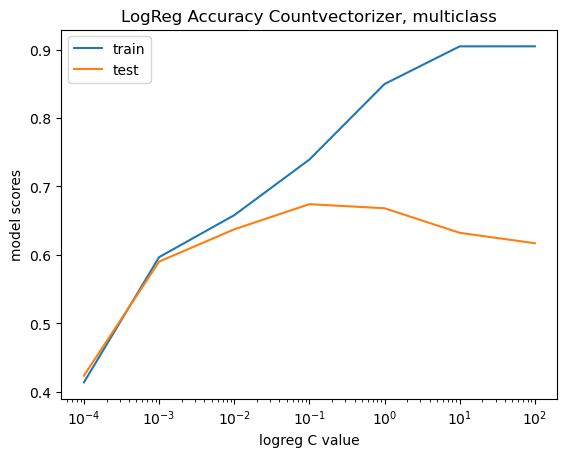

In [44]:
plt.figure()
plt.plot(c_test, train_score, label = 'train')
plt.plot(c_test, test_score, label = 'test')
plt.xscale("log")
plt.xlabel('logreg C value')
plt.ylabel('model scores')
#plt.axvline(0.1, linestyle = '--', c = 'black')
#plt.axvline(1, linestyle = '--', c = 'black')
plt.legend()
plt.title('LogReg Accuracy Countvectorizer, multiclass')
plt.show()

In [45]:
SVM_model = LinearSVC(C=0.11)
SVM_model.fit(X_train_transformed, y_train)

print(f"The TRAIN classification accuracy is:  {SVM_model.score(X_train_transformed,y_train)}")
print(f"The TEST classification accuracy is:  {SVM_model.score(X_test_transformed,y_test)}")

The TRAIN classification accuracy is:  0.8290077911356483
The TEST classification accuracy is:  0.6740964321646932


c:\Users\trann\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\trann\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


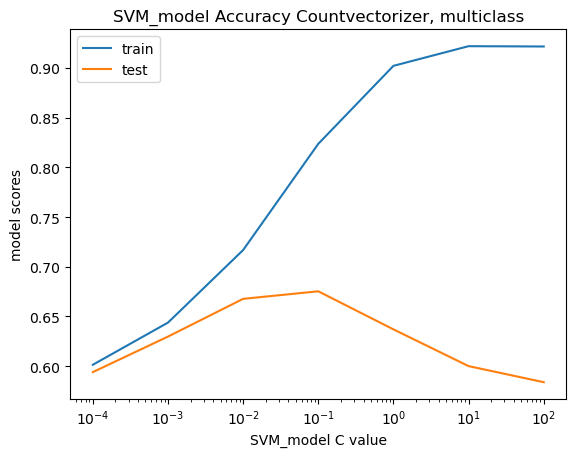

In [46]:
# test different values of C
c_test = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

train_score = []
test_score = []


for i in c_test:
    SVM_model = LinearSVC(C = i)
    SVM_model.fit(X_train_transformed, y_train)
    train_score.append(SVM_model.score(X_train_transformed, y_train))
    test_score.append(SVM_model.score(X_test_transformed, y_test))

plt.figure()
plt.plot(c_test, train_score, label = 'train')
plt.plot(c_test, test_score, label = 'test')
plt.xscale("log")
plt.xlabel('SVM_model C value')
plt.ylabel('model scores')
#plt.axvline(0.1, linestyle = '--', c = 'black')
#plt.axvline(1, linestyle = '--', c = 'black')
plt.legend()
plt.title('SVM_model Accuracy Countvectorizer, multiclass')
plt.show()

In [47]:
DT_model = DecisionTreeClassifier(max_depth=10)
DT_model.fit(X_train_transformed, y_train)

print(f"The TRAIN classification accuracy is:  {DT_model.score(X_train_transformed,y_train)}")
print(f"The TEST classification accuracy is:  {DT_model.score(X_test_transformed,y_test)}")

The TRAIN classification accuracy is:  0.5536866002786234
The TEST classification accuracy is:  0.5422954879653278


In [48]:
# Instantiate the model & fit it to our data
KNN_model = KNeighborsClassifier(n_neighbors=3)
KNN_model.fit(X_train_transformed, y_train)

print(f"The TRAIN classification accuracy is:  {KNN_model.score(X_train_transformed,y_train)}")
print(f"The TEST classification accuracy is:  {KNN_model.score(X_test_transformed,y_test)}")

c:\Users\trann\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


The TRAIN classification accuracy is:  0.7477684330013931
The TEST classification accuracy is:  0.5902019967494776


c:\Users\trann\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [49]:
X

0        Fast as [NAME] will carry me. Seriously uptown...
1              You blew it. They played you like a fiddle.
2        TL;DR No more Superbowls for [NAME]. Get ready...
4        Emotes have a ridiculous amount of effort put ...
5        Just life.. I feel like i'm just a parasite th...
                               ...                        
56867                          Stop, this is a safe space.
56869      I can see why! I would totally be offended too!
56870    Approaching doesn't work unless you are [NAME]...
56871                                      Hahaha perfect.
56872                                Ok now that was epic!
Name: text, Length: 51683, dtype: object

In [73]:
from sklearn.feature_extraction.text import CountVectorizer

# 1. Instantiate
bagofwords = CountVectorizer(stop_words="english", min_df = 20)
# 2. Fit
bagofwords.fit(X)

# 3. Transform
X_transformed = bagofwords.transform(X)
X_transformed

<51683x2185 sparse matrix of type '<class 'numpy.int64'>'
	with 216986 stored elements in Compressed Sparse Row format>

In [74]:
from sklearn.decomposition import TruncatedSVD

In [75]:
svd = TruncatedSVD(n_components=100)

svd.fit(X_transformed)

X_test = svd.transform(X_transformed)

In [76]:
svd.explained_variance_ratio_

array([0.01675554, 0.01711346, 0.01177752, 0.01063855, 0.01024965,
       0.00969769, 0.00785816, 0.00735885, 0.00732394, 0.00668264,
       0.006627  , 0.00626039, 0.00621229, 0.00599699, 0.00530613,
       0.00500992, 0.00490607, 0.00481733, 0.00473877, 0.00463884,
       0.00454001, 0.00453076, 0.00447638, 0.00444077, 0.00429547,
       0.00422528, 0.00413812, 0.00397855, 0.00393656, 0.00388637,
       0.00383089, 0.00372751, 0.00371685, 0.00366516, 0.00364156,
       0.00356457, 0.00353382, 0.00347619, 0.00347123, 0.00341338,
       0.00339901, 0.00332873, 0.00322238, 0.00318178, 0.00307538,
       0.00304123, 0.00292017, 0.00286687, 0.00282014, 0.00277637,
       0.00275845, 0.00273318, 0.00267727, 0.00267237, 0.00262808,
       0.00256674, 0.00253431, 0.0025226 , 0.00249223, 0.00247586,
       0.00244758, 0.00243707, 0.00241254, 0.00240156, 0.00238854,
       0.00234897, 0.00227988, 0.00224343, 0.00220892, 0.00217298,
       0.00216197, 0.00215251, 0.00211767, 0.00210745, 0.00209

In [77]:
# Pull out the explained variance ratio
expl_var = svd.explained_variance_ratio_

# Calculate the cumulative sum of this array using the 
cumulative_sum = np.cumsum(expl_var)

cumulative_sum

array([0.01675554, 0.033869  , 0.04564651, 0.05628506, 0.06653471,
       0.0762324 , 0.08409055, 0.0914494 , 0.09877334, 0.10545598,
       0.11208298, 0.11834336, 0.12455566, 0.13055265, 0.13585878,
       0.14086869, 0.14577476, 0.1505921 , 0.15533087, 0.15996971,
       0.16450972, 0.16904048, 0.17351685, 0.17795762, 0.18225309,
       0.18647837, 0.19061648, 0.19459503, 0.1985316 , 0.20241797,
       0.20624886, 0.20997637, 0.21369322, 0.21735838, 0.22099994,
       0.22456451, 0.22809833, 0.23157452, 0.23504575, 0.23845912,
       0.24185813, 0.24518686, 0.24840924, 0.25159102, 0.2546664 ,
       0.25770763, 0.26062779, 0.26349467, 0.26631481, 0.26909118,
       0.27184963, 0.27458281, 0.27726007, 0.27993244, 0.28256052,
       0.28512726, 0.28766157, 0.29018416, 0.29267639, 0.29515225,
       0.29759983, 0.3000369 , 0.30244943, 0.304851  , 0.30723954,
       0.30958852, 0.3118684 , 0.31411183, 0.31632075, 0.31849373,
       0.3206557 , 0.32280822, 0.32492588, 0.32703333, 0.32912

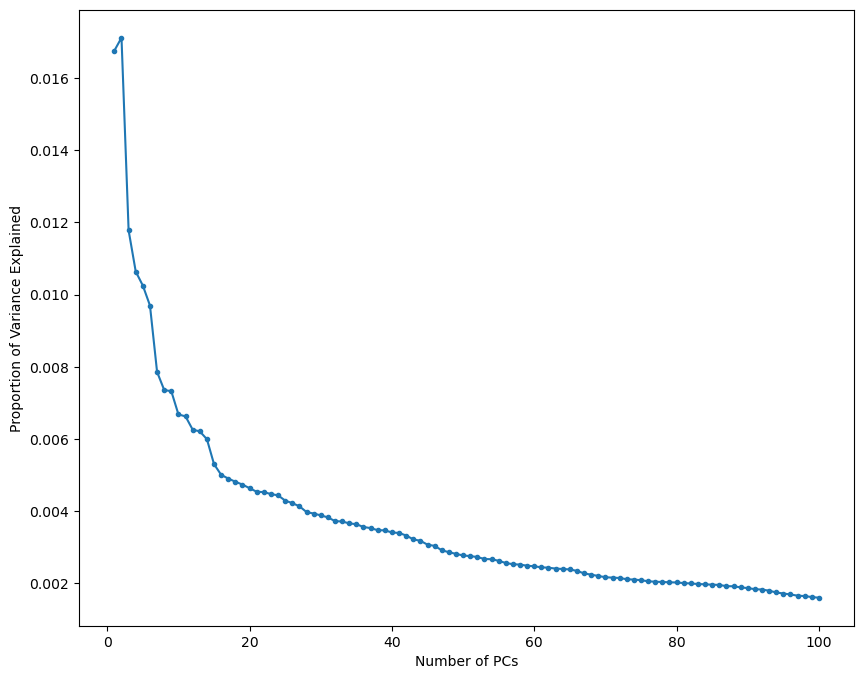

In [78]:
plt.figure(figsize = (10,8))
plt.plot(range(1,101),expl_var,marker='.')
plt.xlabel('Number of PCs')
plt.ylabel('Proportion of Variance Explained')
# plt.xticks(range(1,31,2))
plt.show()

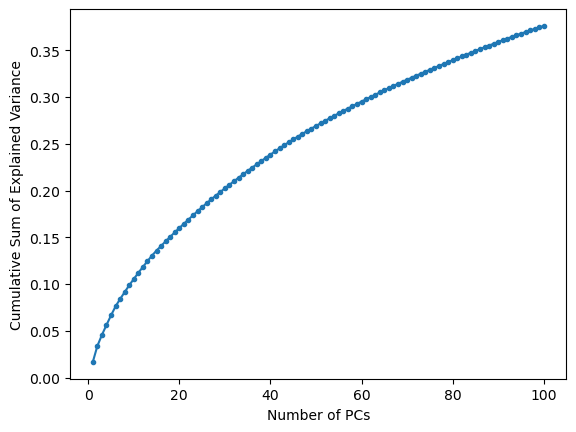

In [79]:
# Plot out the cumulative sum graph

plt.figure()
plt.plot(range(1,101), cumulative_sum, marker='.')
# plt.axhline(0.9, c='r', linestyle='--')
plt.xlabel('Number of PCs')
plt.ylabel('Cumulative Sum of Explained Variance')
# plt.xticks(range(1,31,2))
plt.show()

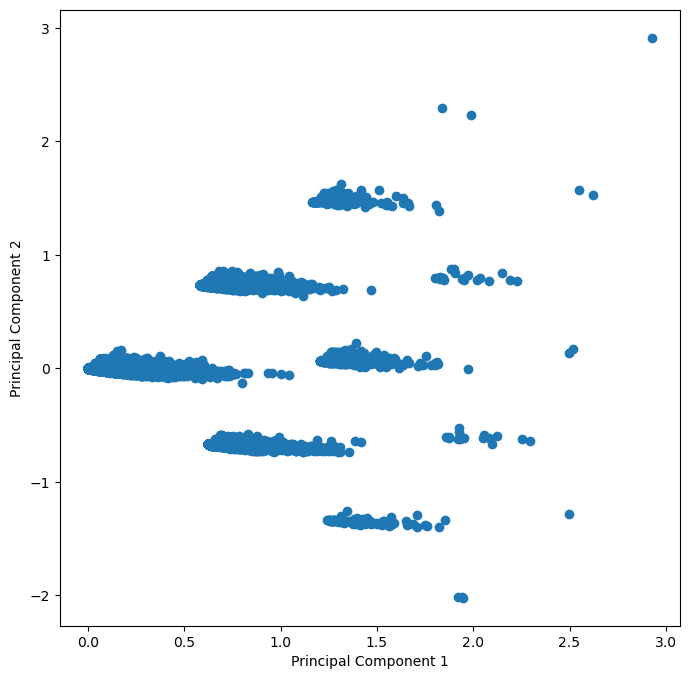

In [80]:
# Plotting the PCA-transformed data (only the first two dimensions)
plt.figure(figsize=(8, 8))
plt.scatter(X_test[:,0],X_test[:,1])

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.show()

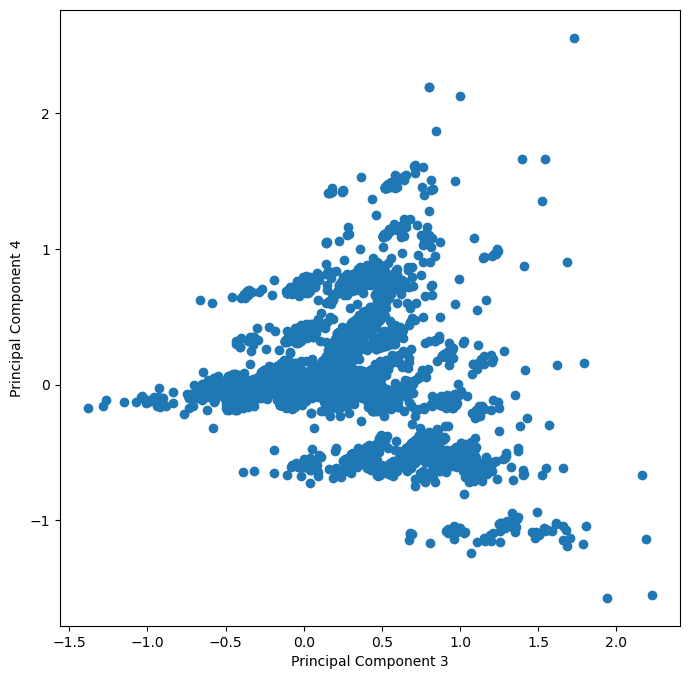

In [82]:
# Plotting the PCA-transformed data (only the first two dimensions)
plt.figure(figsize=(8, 8))
plt.scatter(X_test[:,2],X_test[:,3])

plt.xlabel("Principal Component 3")
plt.ylabel("Principal Component 4")

plt.show()

In [58]:
# from sklearn.cluster import AgglomerativeClustering

# Initialize 
# agglomerative = AgglomerativeClustering(n_clusters=3, linkage='ward')

# Fit and predict
# cluster_labels = agglomerative.fit(X_test)

In [ ]:
# Visualize with centers
#plt.figure(figsize=(8, 8))
#plt.scatter(X_test[:, 0], X_test[:, 1], c=cluster_labels, alpha=0.5)
#plt.show()

# Summary